# Week of OCT21 

**Question 1** 

Simple linear regression is a normal distribution. It has a mean location parameter controlled by the striaght line linear equation: y = mx + b, however with just a slight change. The simple linear regression model is written as *Yi = β0 + β1xi + εi.* This model is used to describe the relationship between two variables, the predictor, which is the independent variable; and the outcome, which is the dependent variable. This model assumes that changes in the predictor variable are influenced with changes in the outcome variable in a linear way. So as one variable increases or decreases, the other does so at a constant rate. Yet these two variables are not the only main compnonents, there are many others used in the equation, which are the following: 
- Predictor variable represented with Xi: the independent varaible influencing the outcome variable.
- Outcome variable represented with Yi: the depdent variable, which it is being tried to predict or explain.
- Slope represented by β1: a coefficient that represents the rate of the change of Y as X changes. If the slope is positive it means X increases,and Y is influenced to do the same. This coefficient quantifities the strength and direction between  and Y.
- Intercept coefficient represented by β0: is the value of the Y varaible when X is 0. Represents when the line crosses the y-axis on a graph, and it serves as the baseline from which changes in Y are measured as X changes.
- Error term represented by εi: this elements captures the difference between the actual observed outcome values and the ones predicted in the model, it basically accounts for randomness, or influences from varaibles which are not included in this model. 

The predictor, outcome,coefficients and error term create values of Y that follow a normal distribution around the predicted line, each one contributing to a different part:
- The equation of the model represents the predicted value of Y baesd on any given value of X, the combination of the slope and coefficient intercept forms the expected line of the distribution. And for each value of X, the line gives a predicte dmean around which Y may vary. 
- The error term is assumed to follow a normal distribution with a mean of 0 and some constant variance, which shows the actual observatinos don't fall excatly on the line, but they are in reality spreaded out. 
- For any fixed X = x, the actual observed values of Y are distributed around th predicted line. This means that if there were many samples for a particular X value, their Y values would form a normal distribution centered around the β0 + β1xi. And if we were to repeat this processs across diferent values of X, the reulting values of Y for each X create a set of normal distribution along the predicted line. 

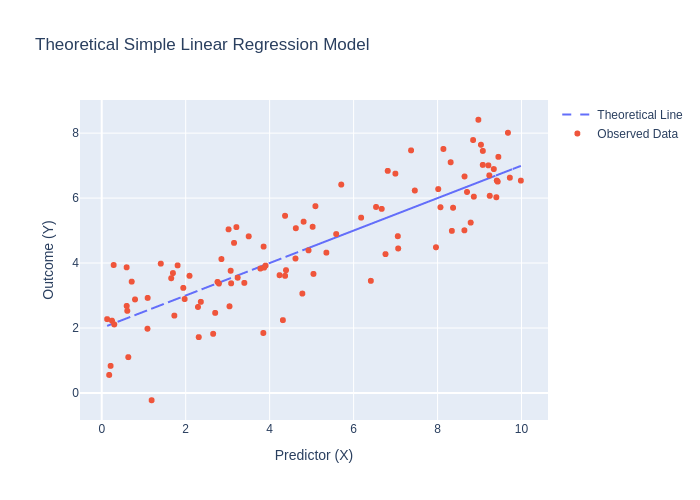

In [1]:
import numpy as np
import plotly.graph_objects as go
from scipy.stats import norm, uniform

# Set parameters
n = 100  # Number of data points
beta0 = 2  # Intercept
beta1 = 0.5  # Slope
sigma = 1  # Standard deviation of the error term

# Generate predictor values (X) from a uniform distribution
x = uniform.rvs(loc=0, scale=10, size=n)

# Generate error terms (epsilon) from a normal distribution
epsilon = norm.rvs(loc=0, scale=sigma, size=n)

# Calculate outcome values (Y) using the Simple Linear Regression model equation
y = beta0 + beta1 * x + epsilon

# Calculate the theoretical regression line (without error)
y_theoretical = beta0 + beta1 * x

# Create the plot
fig = go.Figure()

# Plot the theoretical line
fig.add_trace(go.Scatter(x=x, y=y_theoretical, mode='lines', name='Theoretical Line', line=dict(dash='dash')))

# Plot the observed data points
fig.add_trace(go.Scatter(x=x, y=y, mode='markers', name='Observed Data'))

# Update layout
fig.update_layout(
    title='Theoretical Simple Linear Regression Model',
    xaxis_title='Predictor (X)',
    yaxis_title='Outcome (Y)',
    showlegend=True
)

fig.show(renderer="png")


The visualizaiton above provides an example on how the simple leanr regerssion model works in theory, showing that Y calues are normally distributed around the line defined by the intercept and the slope 

*Chatbot summary:* https://chatgpt.com/share/672c0915-38c0-8002-a164-8da07ba242da

**Question 2**

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     200.0
Date:                Thu, 07 Nov 2024   Prob (F-statistic):           2.09e-25
Time:                        00:29:23   Log-Likelihood:                -141.51
No. Observations:                 100   AIC:                             287.0
Df Residuals:                      98   BIC:                             292.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2222      0.193     11.496      0.0

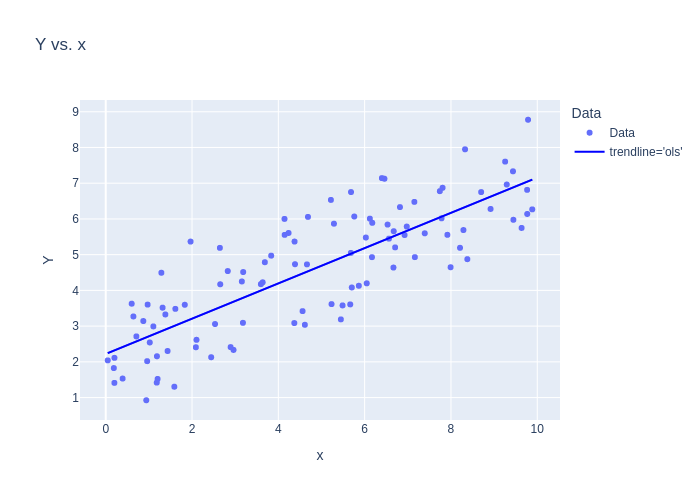

In [2]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf  # statsmodels library allows us to specify and fit statistical models, such as OLS (Ordinary Least Squares) regression.
import plotly.express as px  # This is a plotting library for creating simple and interactive plots.

# Simulated dataset
np.random.seed(0)
n = 100
beta0 = 2  # True intercept
beta1 = 0.5  # True slope
sigma = 1  # Standard deviation of the error term

# Generate predictor values (x) from a uniform distribution and error terms (epsilon) from a normal distribution
x = np.random.uniform(0, 10, n)
epsilon = np.random.normal(0, sigma, n)

# Calculate outcome values (Y) using the theoretical Simple Linear Regression model equation
Y = beta0 + beta1 * x + epsilon

# Combine x and Y into a pandas DataFrame
df = pd.DataFrame({'x': x, 'Y': Y})

# Fit the Simple Linear Regression model
# The following line specifies the model by defining "Y ~ x" (i.e., Y as a function of x)
model_data_specification = smf.ols("Y ~ x", data=df)  # Specifies the Ordinary Least Squares (OLS) model structure
fitted_model = model_data_specification.fit()  # Fits the model to the data, estimating coefficients

# Summary information about the fitted model
print(fitted_model.summary())  # Provides a detailed summary of the model, including coefficients, R-squared, and statistical tests
print(fitted_model.summary().tables[1])  # Outputs a table specifically with regression coefficients, their standard errors, t-values, and p-values
print(fitted_model.params)  # Shows the estimated values of the intercept (beta0) and slope (beta1)
print(fitted_model.params.values)  # Provides the intercept and slope as an array of values, useful for indexing or calculations
print(fitted_model.rsquared)  # Gives the R-squared value, indicating the proportion of variance in Y explained by X

# Visualization
df['Data'] = 'Data'  # Adds a column to help color data points in the legend
fig = px.scatter(df, x='x', y='Y', color='Data', trendline='ols', title='Y vs. x')  # Creates scatter plot and adds OLS trendline

# This essentially replicates the trendline added above by specifying a custom scatter trace for the fitted values
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues,
                line=dict(color='blue'), name="trendline='ols'")

fig.show(renderer="png")


*Further explanation on the previous code:*
Library imports: import statsmodels.formula.api as smf: 
- statsmodel libreary is used for specifying and fitting statistical models. the smf.ols() is what allow to specify a model using ordinary least squares regression. while the impor plotly.express as px: plotly.express simplifies plotting by enablign the creation of interactive and easy to understand plots (which can be viewed if the renderer="png" is eliminated from the code). 

Model Speicfication and fitting: 
- model_data_specification = smf.ols("Y ~ x", data=df): specifies the OLS regression model, and defnines Y as a linear function of x. Additionally, fitted_model = model_data_specification.fit() is a step that fits the model to the data, estimates the values of the incerpts and also the slope coefficient 

Interpreting MOdel Output: 
- fitted_model.summary() is what provies a statistical summary of this model, it includes the estimated coefficient, standard errors, statistics, p-values r-quared and more statistics that are valuable when supporting the claim of what the model is giving as evidence. The fitted_model.parms is wha shows the estimated values for β1 and β0.  The fitted_model.rsquared: is what provides the r-squared value, which is what measures the proportion of the variance in Y explained by x 

Visualization: 
- df['Data'] = 'Data', by adding this column allows to differentiate data poitns in the plot by adding a label to the legend. while fig = px.scatter(...): is what adds a custom scatter trace for the fitted values, which replicates the trendline in plotly.express in a customized way. 

 *Chatbot summary:* https://chatgpt.com/share/672c0915-38c0-8002-a164-8da07ba242da


**Question 3**

Combined first and second question code:

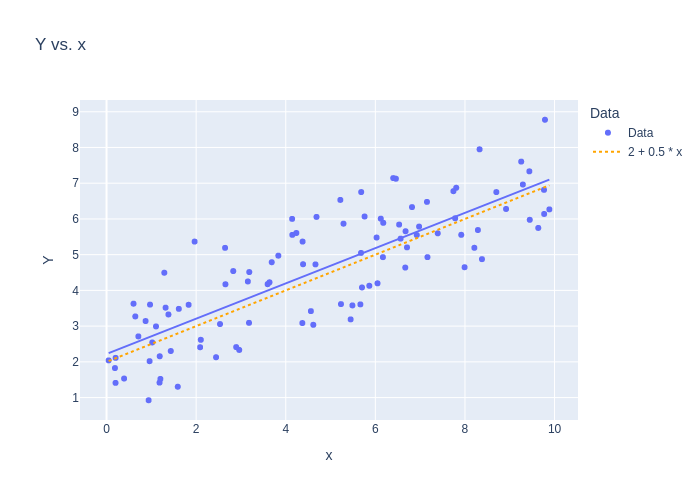

In [4]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import plotly.express as px
from scipy.stats import norm, uniform

# Simulate dataset
np.random.seed(0)
n = 100
beta0 = 2  # True intercept
beta1 = 0.5  # True slope
sigma = 1  # Standard deviation of the error term

# Generate predictor values (x) and error terms (epsilon)
x = np.random.uniform(0, 10, n)
epsilon = np.random.normal(0, sigma, n)

# Calculate outcome values (Y) using the theoretical model
Y = beta0 + beta1 * x + epsilon

# Create DataFrame
df = pd.DataFrame({'x': x, 'Y': Y})

# Fit the model
model_data_specification = smf.ols("Y ~ x", data=df)
fitted_model = model_data_specification.fit()

# Plot data, fitted line, and theoretical line
df['Data'] = 'Data'  # for legend
fig = px.scatter(df, x='x', y='Y', color='Data', trendline='ols', title='Y vs. x')

# Add theoretical line to the plot
x_range = np.array([df['x'].min(), df['x'].max()])
y_line = beta0 + beta1 * x_range
fig.add_scatter(x=x_range, y=y_line, mode='lines', name=str(beta0) + ' + ' + str(beta1) + ' * x',
                line=dict(dash='dot', color='orange'))

fig.show(renderer="png")  # Change renderer to "png" if using on GitHub or MarkUs

The added code overalys the theorical model line (based on β0 and β1) onto the scatter plot with the fitted regression line obtained from statsmodels. 

The difference between the nature of the two lines: first of all, the theoretical line, which is represented by the dashed orange line, represents the actual relationship between x and Y as determined by the known slope and intercept (β0 and β1, respectively). This line is based on the theoretical model without the use of sampling variation. The line is created by calculating directly using the formula from the Simple Linear Regression Equation Formula. By not incorporating the random sampling,this line shows the ideal scenarion of the relationship of x and Y. While the second line, fitted line, which is representend by the blue line, represents the estimated relationship between x and Y based on the simulated data sample. This line is created using ols to estimate the slope and the intercept (β0 and β1), in an attempt to lower the differences between the observed data points and the line. Considering that a lower difference between those two elements represents a higher relationship. Yet, due to the random error in each simulated dataset, the estimated β0 and β1 varies, causing the fitted line to differ from the theoretical line. 

The use of these two lines is helpful to show how random sampling variation affects model estimation, as the theoretical line repreents the true relationship wiht no randomness, while the fitted line does show the outcome of the line when sampling variation is present. Showing evidence that random sampling in fact impacts on the simple linear model estimation.

So basically the difference between the nature of the two lines is that the fitted line represents the estimated relationship of x and y but it takes into account random sampling, due to the random error terms added to Y. While the theoretical line shows the ideal and true relationship x and y have, since there is no variation included? 

*Chatbot summary:* https://chatgpt.com/share/672c0915-38c0-8002-a164-8da07ba242da

**Question 4**

fitted_model.fittedvalues is the function that allows to access to the fitted values directly from the estimated parameter of the model. The given parameters are presented in fitted_model.params, or fitted_model.summary.tables[1] in the regression summary output. 
Being aware that the model can be written as $\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x$, where $\hat{y}$ is the fitted value of the depdent varaible, $\hat{\beta}_0$ is the intercept estimated by the model, and $\hat{\beta}_1$ is the slope estimated for x. In the fitted_model.params, fitted_model.params[0] corresponds to the intercept $\hat{\beta}_0$, while fitted_model.params[1] corresponds to the slope $\hat{\beta}_1$. 
To be able to calculate each of the fitted value $\hat{y}_i$ for an observed value $x_i$, the only thing to do is to substitute into the equation $\hat{y}_i = \hat{\beta}_0 + \hat{\beta}_1 x_i$

Basically, the fitted_model.fittedvalues are derived using the estimated coefficients stores in fitted_model.params or fitted_model.params.values. By first retrieving the values in any of these functions, which contain the estimated intercept and slope of the simple linear regression line model. Then for each observed $i$ , the fitted value $\hat{y}$ is calculated by using the estimated parameters derived from fitted_model.params and the value of the independent variable $x_i$ in the equation. 

*Chatbot summary:* https://chatgpt.com/share/672d16a2-8650-8002-86ac-778b8cdbf0a3

**Question 5** 

explain what line is chosen for the fitted model based on observed data using the ordinary least squares method
why it requires squares 

For a fitted model, the line chosen using the ordinary least squares is the one that has the lowest total residuals between the observed data points and the ideal line. The residuals as seen before tare the vertical distances between the actual and the predicted value of $y$ on the line. These residuals represent how much the model's predictions differ form the actual values by using random sampling. 
In the visualization below, the residuals are represented as red dashed lines connecting each point to the line of best fit. The purpose of the OLS is to chos a line where the sum of the distances between the points and the line, squared, is as small as possible. Moreover, this model squares the residuals instead of just staying with the sum of the absolute value in order to avoid cancellation between the positve and negative values, thus preventing erroneous results. By squaring the sum, the model ensurates that all the deviations are transformed into positve values which then adds to the total error, and gives the true distnce of data poitns from the line. On top of that, the model also requires squares in order to emphasize the larger errors which is useful when the model wants to visualize the sesitiviness to large deviations.  

In [5]:
import scipy.stats as stats
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import plotly.express as px
import plotly.graph_objects as go

# Set parameters
n, x_min, x_range, beta0, beta1, sigma = 20, 5, 5, 2, 3, 5

# Generate data
x = stats.uniform(x_min, x_range).rvs(size=n)
errors = stats.norm(loc=0, scale=sigma).rvs(size=n)
y = beta0 + beta1 * x + errors  # Use lowercase 'y' to match DataFrame

# Create DataFrame
df = pd.DataFrame({'x': x, 'y': y})

# Fit model
model_data_specification = smf.ols("y ~ x", data=df)  # Note lowercase 'y'
fitted_model = model_data_specification.fit()

# Add Data column for color coding in plot
df['Data'] = 'Data'

# Create scatter plot with OLS trendline
fig = px.scatter(df, x='x', y='y', color='Data', trendline='ols', title='Y vs. x')

# Add custom trendline based on fitted model
fig.add_trace(
    go.Scatter(x=df['x'], y=fitted_model.fittedvalues,
               mode='lines', line=dict(color='blue'),
               name="OLS trendline")
)

# Add theoretical line based on beta0 and beta1
x_range = np.array([df['x'].min(), df['x'].max()])
y_line = beta0 + beta1 * x_range
fig.add_trace(
    go.Scatter(x=x_range, y=y_line, mode='lines', 
               line=dict(dash='dot', color='orange'),
               name=f"{beta0} + {beta1} * x")
)

# Add vertical lines for residuals
for i in range(len(df)):
    fig.add_trace(
        go.Scatter(x=[df['x'][i], df['x'][i]],
                   y=[fitted_model.fittedvalues[i], df['y'][i]],
                   mode='lines', line=dict(color='red', dash='dash'),
                   showlegend=False)
    )

# Add horizontal line at mean of y
fig.add_trace(
    go.Scatter(x=x_range, y=[df['y'].mean()]*2, mode='lines',
               line=dict(color='black', dash='dot'), name='y-bar')
)

# Display the figure in Jupyter Notebook
fig.show(renderer="iframe")  # 'iframe' renderer is usually compatible with Jupyter


*Chatbot summary:* https://chatgpt.com/share/672d1b47-7e34-8002-b20b-20312c26b2c5

**Question 6**

So the formula 1-((Y-fitted_model.fittedvalues)^2).sum()/((Y-Y.mean())^2).sum() is a way to calculate $R^2$ which is used to understand how well the regression model explains the varaiton in the outcome variable Y. The denominator ((Y-Y.mean())^2).sum() is the part that calulates the total variation in Y, by calculating how much each actual value deviates from the mean. It shows how spread out are the Y values from their average, which is known as the total sum of squares (TSS). The numerator, ((Y-fitted_model.fittedvalues)^2).sum() calculates the variation in Y that the model did not capture by computing how far each eactual Y value is from the predcited value in the model, this to know how much error is there in the prediction's, and it is called the residual sum of squares (RRS). Therefore, the fraction RRS/TSS gives the proportion of the total variation in Y that the simple linear regresision model does not capture. And, when 1 is substracted to that, the result is the proportion of the total variation that the model did explained, which is the value for the r-squared. This proportion will range from 0 to 1, where closer to 1 means the model explains most of the varation; and wehn closer to 0 means the model explains a minimal part of the variation. 

Taking into account that $R^2$ derives how mch of the variation in Y is explained by the model, its result is consdiered a measure of accuracy, because a higher $R^2$ closer to 1 means the model's predicitons are closer to what the actual values are.Therefore assessing how the model fits the data. 

Yet $R^2$ is also the square of the correlation coefficitient between Y and fitted_model.fittedvalues or even between Y and the predictor variable $x$. np.corrcoef(Y, fitted_model.fittedvalues)[0,1]^2 calulates the squared relation betwen the Y values and the predicted values. Squares the correlation in this part will capture the smae value as $R^2$ in a simple linear regression model. Additionally, np.corrcoef(Y, x)[0,1]^2 calculates the squared relationship between Y and x, and in the model, the value will be equal to $R^2$ since the predictions are a direct function of $x$

*Chatbot summary:* https://chatgpt.com/share/672d54a0-0dc0-8002-93dc-e6fdd70d89d1

**Question 7** 

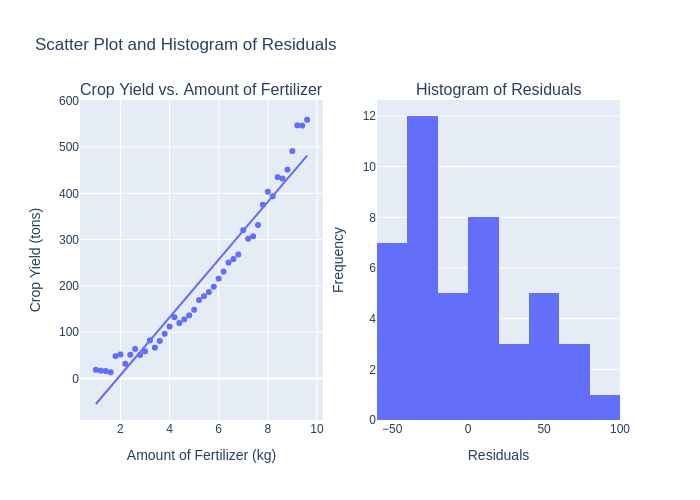

In [1]:
import pandas as pd
from scipy import stats
import plotly.express as px
from plotly.subplots import make_subplots

# This data shows the relationship between the amount of fertilizer used and crop yield
data = {'Amount of Fertilizer (kg) (x)': [1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4, 2.6, 
                                          2.8, 3, 3.2, 3.4, 3.6, 3.8, 4, 4.2, 4.4, 
                                          4.6, 4.8, 5, 5.2, 5.4, 5.6, 5.8, 6, 6.2, 
                                          6.4, 6.6, 6.8, 7, 7.2, 7.4, 7.6, 7.8, 8, 
                                          8.2, 8.4, 8.6, 8.8,9, 9.2, 9.4, 9.6],
        'Crop Yield (tons) (Y)': [18.7, 16.9, 16.1, 13.4, 48.4, 51.9, 31.8, 51.3, 
                                  63.9, 50.6, 58.7, 82.4, 66.7, 81.2, 96.5, 112.2, 
                                  132.5, 119.8, 127.7, 136.3, 148.5, 169.4, 177.9, 
                                  186.7, 198.1, 215.7, 230.7, 250.4, 258. , 267.8, 
                                  320.4, 302. , 307.2, 331.5, 375.3, 403.4, 393.5,
                                  434.9, 431.9, 451.1, 491.2, 546.8, 546.4, 558.9]}
df = pd.DataFrame(data)
fig1 = px.scatter(df, x='Amount of Fertilizer (kg) (x)', y='Crop Yield (tons) (Y)',
                  trendline='ols', title='Crop Yield vs. Amount of Fertilizer')

# Perform linear regression using scipy.stats
slope, intercept, r_value, p_value, std_err = \
    stats.linregress(df['Amount of Fertilizer (kg) (x)'], df['Crop Yield (tons) (Y)'])
# Predict the values and calculate residuals
y_hat = intercept + slope * df['Amount of Fertilizer (kg) (x)']
residuals = df['Crop Yield (tons) (Y)'] - y_hat
df['Residuals'] = residuals
fig2 = px.histogram(df, x='Residuals', nbins=10, title='Histogram of Residuals',
                    labels={'Residuals': 'Residuals'})

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=('Crop Yield vs. Amount of Fertilizer', 
                                    'Histogram of Residuals'))
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)
for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)
fig.update_layout(title='Scatter Plot and Histogram of Residuals',
    xaxis_title='Amount of Fertilizer (kg)', yaxis_title='Crop Yield (tons)',
    xaxis2_title='Residuals', yaxis2_title='Frequency', showlegend=False)

fig.show(renderer="png")

After taking a look at the data and at the plot, there are two main assumptions of the simple Linear Regresssion model that aren't compatible with this dataset.
1. Linearity: according to the visualizaiton of the scatter plot, the data shows a non linear relationship between the amount of ferlizer and the crop yiel, As an example, when the amount of fertilizer increases, where crop yield escalates quickly in higer ranges. Due to this fact, a simple linear regression model is not the best fit. 
2. Constant Variance of Errors: accourding to what is shown in the histrogram of the residuals, it is clear that some of the residuals aren't evenly distributed around 0 whihc is an indicator of heteroscedasticity. And if the residuals increase in spread as the amount of fertilizer increases, then that is violating an assumption of a linear model since the variable off the errorrs is not constant across all levles of the indepdnet variable. 

*Chatbot summary:* https://chatgpt.com/share/672d5657-8614-8002-90db-e35f63fedaa4

# Week of Nov4

**Question 8**

For the following code, the null hypothesis is:
H0: β_1 = 0, which states there is no linear association between the waiting time and the eruption duration on average 

HA: β_1 ≠ 0, which states there is a linear association between the waiting time and eruption duration. 

In [2]:
import seaborn as sns
import statsmodels.formula.api as smf

# The "Classic" Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

linear_for_specification = 'duration ~ waiting'
model = smf.ols(linear_for_specification, data=old_faithful)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1162.
Date:                Fri, 08 Nov 2024   Prob (F-statistic):          8.13e-100
Time:                        00:54:55   Log-Likelihood:                -194.51
No. Observations:                 272   AIC:                             393.0
Df Residuals:                     270   BIC:                             400.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8740      0.160    -11.702      0.000      -2.189      -1.559
waiting        0.0756      0.002     34.089      0.000       0.071       0.080
==============================================================================
Omnibus:                        4.133   Durbin-Watson:                   2.561
Prob(Omnibus):                  0.127   Jarque-Bera (JB):                3.173
Skew:                          -0.138   Prob(JB):                        0.205
Kurtosis:                       2.548   Cond. No.                         384.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

With the results of this code there are several interpretations that can be made: 
- The estimated coefficient for waiting is 0.0756 with a low standard error, which suggests that for each additonal unit of waiting time, the duration of eruptions increases on average 0.0756 units.
- The p-value for the waiting coefficient is extremmely low, which is below also the significnace levels, thus providing extremely strong evidence against H0. 

Therefore the conclusion is that there is strong evidence against the null hypothesis, and it is rejected. The dataset has given enough evidence showing there is linear association between the waiting and the duration in the Old Faithful dataset. The data shwos that longer waiting times are associated with longer eruption durations on average. Moreover, the relaitonship is strong and predictable, according to $R^2$ value of 0.811 which indicates there is 81.1% of the variance in eruption duration is explained by waiting time. 

*Chatbot summary:* https://chatgpt.com/share/672d63e0-2160-8002-acf3-9b44b7b4b6c3

**Question 9**


                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6401      0.309      5.306      0.000       1.025       2.255
waiting        0.0069      0.006      1.188      0.238      -0.005       0.019


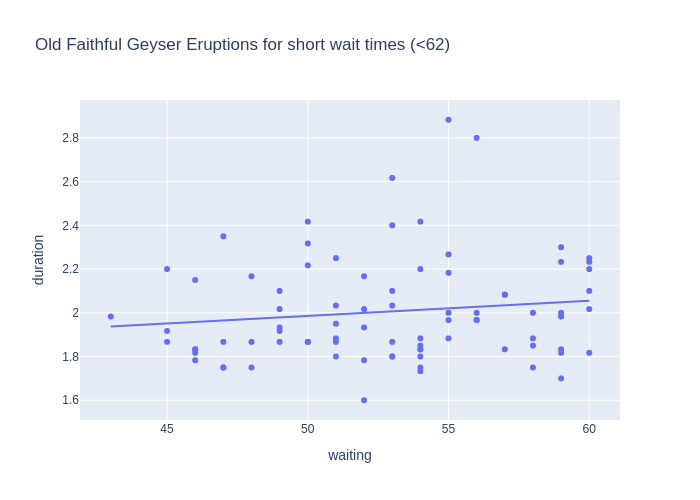

In [4]:
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 62 # 64 # 66 #
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer="png")

For the code above which shows a shor wait time limit of 62 minutes, the evidence is the following: 
- The estimated intercept is 1.64 which means that for very shor waiting times, the eruption duration is predicted to be 1.64 minutes approximately.
- The slope for waiting is 0.0069 which shows a slight positive asssociation between tthe waiting time and the eruption duration. 
- The p-value for the waiting coefficient is 0.238 which is still above the signficance level.

With all the evidence gathered for the 62 minute short time wait limit, there is not enough evidence to fail to reject the null hypothesis. Due to the fact that if the p value is more than 0.1 it is said there is no evidence against the null hypothesis, and in this case the p-value is 0.238. So, in this context there is no significant linear association between the waiting time and the eruption duration. Which is opposite to what is observed in the full data set. 


                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4140      0.288      4.915      0.000       0.842       1.986
waiting        0.0114      0.005      2.127      0.036       0.001       0.022


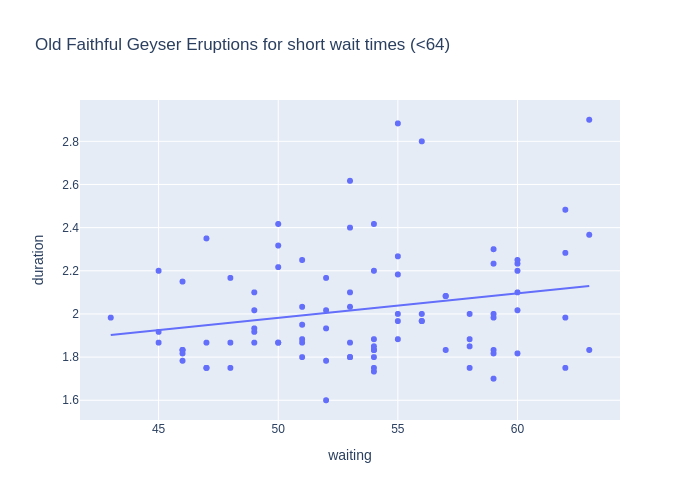

In [5]:
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 64 # 66 #
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer="png")

For the code above which shows a short wait time limit of 64 minutes, the evidence is the following: 
- The estimated intercept is 1.4140 which means that for very shor waiting times, the eruption duration is predicted to be 1.41 minutes approximately.
- The slope for waiting is 0.0114 which shows a small positive asssociation between tthe waiting time and the eruption duration. 
- The p-value for the waiting coefficient is 0.036 which is  below the signficance level.

With all the evidence gathered for the 64 minute short time wait limit, there is enough evidence to reject the null hypothesis. Due to the fact that if the p value is between 0.05 and 0.01,  according to the evidence table, there is moderate evidence against the null hypothesis. So, in this context there is a significant linear association between the waiting time and the eruption duration, but it is weaker than the one obtained in the full dataset context.

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8619      0.327      2.637      0.010       0.213       1.511
waiting        0.0221      0.006      3.704      0.000       0.010       0.034


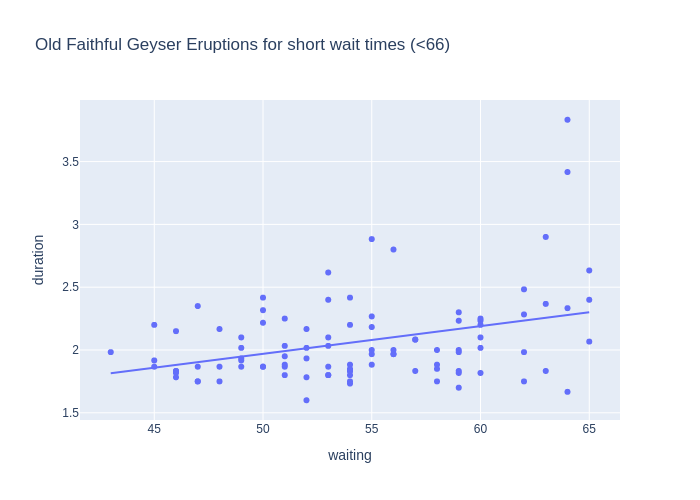

In [6]:
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 66 #
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer="png")

Finnally, for the code above which shows a short wait time limit of 66 minutes, the evidence is the following: 
- The estimated intercept is 0.8619 which means that for very shor waiting times, the eruption duration is predicted to be 0.86 minutes approximately (not even a single minute). 
- The slope for waiting is 0.0221 which shows a noticeable positive asssociation between tthe waiting time and the eruption duration. 
- The p-value for the waiting coefficient is 0.000 which is  below the signficance level.

With all the evidence gathered for the 66 minute short time wait limit, there is very strong evidence to reject the null hypothesis. Due to the fact that if the p value is less than 0.001, and according to the evidence table, that represents very strong evidence against the null hypothesis. So, in this context there is a statistically significant linear association between the waiting time and the eruption duration, which is the same as what it was obtained for the full dataset. 

In the end, it was found that the association between the wait time and the eruption duration on average is stronger for wait time under 66 minutes than the ones under 62 and 64. Thus deriving evidence to argue that as the short wait time limit increases the linear relaitonship will become stronger, and clearer. 

*Chatbot summary:* https://chatgpt.com/share/672d63e0-2160-8002-acf3-9b44b7b4b6c3

**Question 10** 

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3520      0.476      7.049      0.000       2.413       4.291
waiting        0.0122      0.006      2.091      0.038       0.001       0.024


95% Bootstrapped Confidence Interval for Slope: [0.00102069 0.02270241]


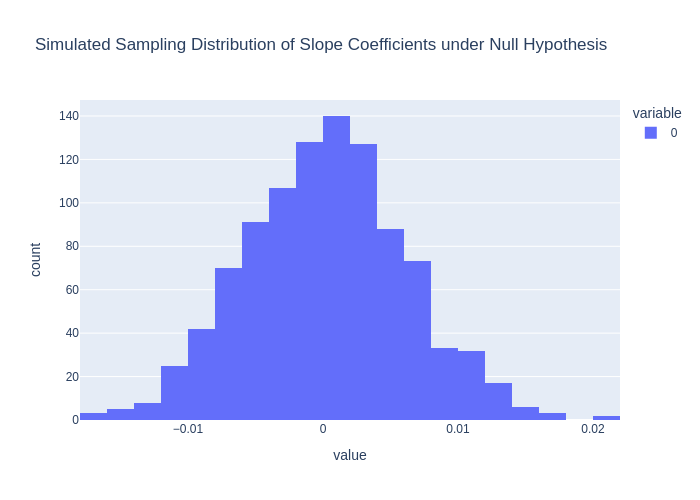

Is the observed slope within the 95% bootstrapped CI? True
Simulated p-value: 0.04
P-value from initial model: 0.038135755338567744


In [11]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import scipy.stats as stats
import plotly.express as px

import seaborn as sns
import statsmodels.formula.api as smf

# The "Classic" Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')
# Step 1: Define long wait times condition
long_wait_limit = 71
long_wait = old_faithful['waiting'] > long_wait_limit

# Step 2: Fit initial linear regression to get observed slope
initial_model = smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit()
observed_slope = initial_model.params[1]
print(initial_model.summary().tables[1])

# Step 3: Bootstrapping slope coefficients
bootstrapped_slope_coefficients = []

# Perform 1000 bootstrap samples
for _ in range(1000):
    sample_data = old_faithful[long_wait].sample(n=long_wait.sum(), replace=True)
    model = smf.ols('duration ~ waiting', data=sample_data).fit()
    bootstrapped_slope_coefficients.append(model.params[1])

bootstrapped_slope_coefficients = np.array(bootstrapped_slope_coefficients)

# Step 4: Visualize bootstrapped slope coefficients
fig = px.histogram(bootstrapped_slope_coefficients, nbins=30, title="Bootstrapped Sampling Distribution of Slope Coefficients")
fig.show()

# Calculate 95% Confidence Interval
bootstrapped_confidence_interval = np.quantile(bootstrapped_slope_coefficients, [0.025, 0.975])
print("95% Bootstrapped Confidence Interval for Slope:", bootstrapped_confidence_interval)

# Step 5: Simulate under Null Hypothesis (no association)
simulated_slope_coefficients = []

# Generate 1000 simulated samples under null hypothesis
for _ in range(1000):
    old_faithful_simulation = old_faithful[long_wait].copy()
    old_faithful_simulation['duration'] = 1.65 + 0 * old_faithful_simulation['waiting'] + stats.norm(loc=0, scale=0.37).rvs(size=long_wait.sum())
    model = smf.ols('duration ~ waiting', data=old_faithful_simulation).fit()
    simulated_slope_coefficients.append(model.params[1])

simulated_slope_coefficients = np.array(simulated_slope_coefficients)

# Step 6: Visualize simulated slope coefficients under null hypothesis
fig = px.histogram(simulated_slope_coefficients, nbins=30, title="Simulated Sampling Distribution of Slope Coefficients under Null Hypothesis")
fig.show(renderer="png")

# Step 7: Check if observed slope is within the bootstrapped 95% CI
is_observed_slope_in_ci = bootstrapped_confidence_interval[0] <= observed_slope <= bootstrapped_confidence_interval[1]
print("Is the observed slope within the 95% bootstrapped CI?", is_observed_slope_in_ci)

# Step 8: Calculate simulated p-value
simulated_p_value = (np.abs(simulated_slope_coefficients) >= np.abs(observed_slope)).mean()
print("Simulated p-value:", simulated_p_value)

# Compare with the p-value from the initial model, using .iloc to avoid FutureWarning
initial_model_p_value = initial_model.pvalues.iloc[1]
print("P-value from initial model:", initial_model_p_value)


*Chatbot summary:* https://chatgpt.com/share/672d6e8a-8418-8002-b8d5-5f27c971a907

**Question 11**

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.0943,0.041,50.752,0.000,2.013,2.176
"C(kind, Treatment(reference=""short""))[T.long]",2.2036,0.052,42.464,0.000,2.101,2.306


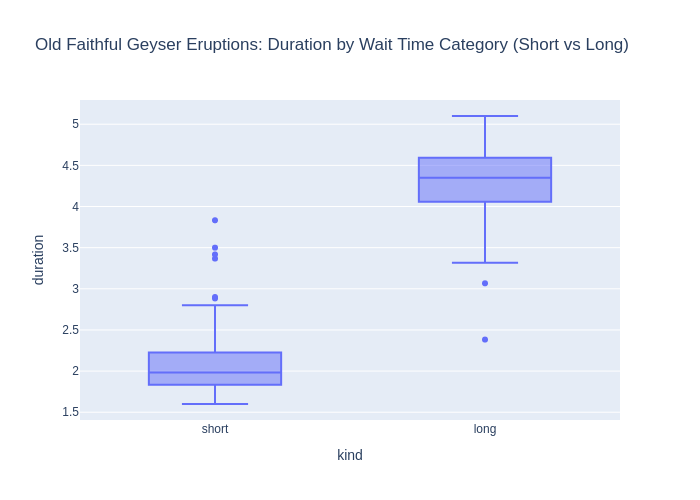

In [13]:
import statsmodels.formula.api as smf
import plotly.express as px
from IPython.display import display
import pandas as pd

# Ensure your dataset includes a 'kind' column based on wait times
# Assuming 'old_faithful' is your dataframe
old_faithful['kind'] = ['short' if wait < 68 else 'long' for wait in old_faithful['waiting']]

# Fit the model with the indicator variable 'kind'
model_with_kind = smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit()
display(model_with_kind.summary().tables[1])

# Create a box plot to visually compare durations between "short" and "long" wait categories
fig = px.box(old_faithful, x='kind', y='duration', 
             title='Old Faithful Geyser Eruptions: Duration by Wait Time Category (Short vs Long)',
             category_orders={'kind': ['short', 'long']})
fig.show(renderer="png")


In this approach of the Old Faithful Geyser Dataset, the indication variable "kind" is used to categorize wait times as short if they are under 68 minutes long, or long is they are 68 minutes or more. In this analysis, there is a shift from focusing on continuos predictor variable into evaluating the differences between the two groups. 
The null hypothesis is: 
H0: there is no difference in average eruption duration between hor t and long waits. 

Main differences between the models: 
Original: 
- The models duration ~ waiting, duration ~ waiting for short_wait and long_wait all treat the vaariable waiting as continuos. 
- The short and long wait times are analyzed separetely by applying the regression to each subset data. 
- These models allowed the observance of a continuos linear relaitonship between the waiting time and the deurption duration. 

New: 
- By using C(kind,Treatment(refrence = "short)), "kind" acts as a indicator variable that is comparing the average eruption duration between long and short wait. 
- Instead of estimating the cange in eruption duration per additional minute of waiting, this model estimates the difference in average eruption duration between the two groutps (short and long time wait), which simplifies the interpretation by comparing the means and not each value. 

Big Picture comparison: 
- The original model which focuses on analyzing the duration of waiting as a continuos variable provides a detailed look at thow small changes affect the duration of eruption. While the indicator vraible focuses on the overall difference in average duration between both groups. While the new model simplifies the work, detail and interpretation, it takes out the nuance of a continuos relationship. 
- The new indicator model gives a direct test of whether the mean duration differs signficantly between the two waiting groups, which is more practical for a generalized understading of how duration time varies with a wait time, without the need of having to interepret and calculate a continuos slope.  

 The smf.ols('duration ~ C(kind,Treatment(reference="short"))',data=old_faithful).fit().summary().tables[1] output provides the following evidence: 
 - The intercept which represents the short waits has a value of 2.0942 which is the average eruption duration for short waits. 
- The coefficient for long waits, derived from the "kind" indicator has a value of 2.2036 which indicates the difference in average eruption duration between the long and the short waits. This value suggests that the eruption duration following a long wait time is on average 2.20 minutes longer than the duration after a short wait time. 
- The p-value for the "kind" variable is extremely low, even below significance levles, since it is at 0.000. 

Conclusion
According to all of the evidence gathered about the "kind" indicator and the new model there is enough evidence to reject the null hypothesis stating that there is no difference in average eruption duration between hor t and long waits. In fact, there is very strong evidecne that there is statisitccally significant difference in the average eruption duration between short and long wait groups. This is said by using the p-value evidence table, since our p-value is 0.0000. The data above states that eruptions tend to last approximately 2.2 more minutes after a long wait compared to a short wait. 

*Chatbot summary:* https://chatgpt.com/share/672d63e0-2160-8002-acf3-9b44b7b4b6c3

**Question 12** 

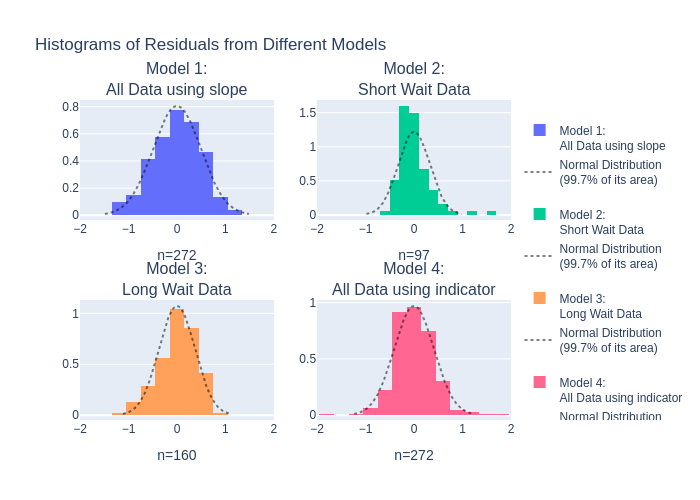

In [14]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from scipy import stats
import numpy as np

model_residuals = {
    '<br>Model 1:<br>All Data using slope': smf.ols('duration ~ waiting', data=old_faithful).fit().resid,
    '<br>Model 2:<br>Short Wait Data': smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().resid,
    '<br>Model 3:<br>Long Wait Data': smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().resid,
    '<br>Model 4:<br>All Data using indicator': smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().resid
}

fig = make_subplots(rows=2, cols=2, subplot_titles=list(model_residuals.keys()))
for i, (title, resid) in enumerate(model_residuals.items()):

    if i == 1:  # Apply different bins only to the second histogram (index 1)
        bin_size = dict(start=-1.9, end=1.9, size=0.2)
    else:
        bin_size = dict(start=-1.95, end=1.95, size=0.3)

    fig.add_trace(go.Histogram(x=resid, name=title, xbins=bin_size, histnorm='probability density'), 
                  row=int(i/2)+1, col=(i%2)+1)
    fig.update_xaxes(title_text="n="+str(len(resid)), row=int(i/2)+1, col=(i%2)+1)    
    
    normal_range = np.arange(-3*resid.std(),3*resid.std(),0.01)
    fig.add_trace(go.Scatter(x=normal_range, mode='lines', opacity=0.5,
                             y=stats.norm(loc=0, scale=resid.std()).pdf(normal_range),
                             line=dict(color='black', dash='dot', width=2),
                             name='Normal Distribution<br>(99.7% of its area)'), 
                  row=int(i/2)+1, col=(i%2)+1)
    
fig.update_layout(title_text='Histograms of Residuals from Different Models')
fig.update_xaxes(range=[-2,2])
fig.show(renderer="png")

1. Model 1 appears symmetrical with a peak near 0 and tails that decrease smoothly, and it possibily supports the normality assumpation. Nonetheless, if there are deviations thn this may not be true. 
2. Model 2: has different bin size and is less symmetrical and has a heavy skew, which indicates non-normality. Often data such as the short wait exhibit more proununced deviatons due to fewer observations and unbalanced residuals.
3. Model 3: this model is similar to Model 2 since it presents large deviatons from the normal curve, and posibly doesn't support normality assumpation. The heavy tails are there if the data distribution is highly variable. 
4. Model 4: shows a more evenly centered around 0 distribution, with a shape almost matchin the normal cuve. yet this model can segment data differencetly which then leads to more balanced resiudals. 

In conclusion, Model 1 is the one that uses the full dta set wihtout segmentation and therefore is the best candidate for normality, since it includes all the observations and even captures the relationship better by producing more normally distributed residualsl. On the other hand, Models 2 and 3 show more deviatons from normality, which eliminate them for being the best fit to show normality. And Model 4 sometimes captures normality but it does this by using segmentation to help balance the residuals, which also eliminates it from being the best histogram to show plausibility. 

*Chatbot summary:* https://chatgpt.com/share/672d77a7-1a68-8002-abcc-4432a74e7eb6

**Question 13**

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.0943,0.041,50.752,0.000,2.013,2.176
"C(kind, Treatment(reference=""short""))[T.long]",2.2036,0.052,42.464,0.000,2.101,2.306


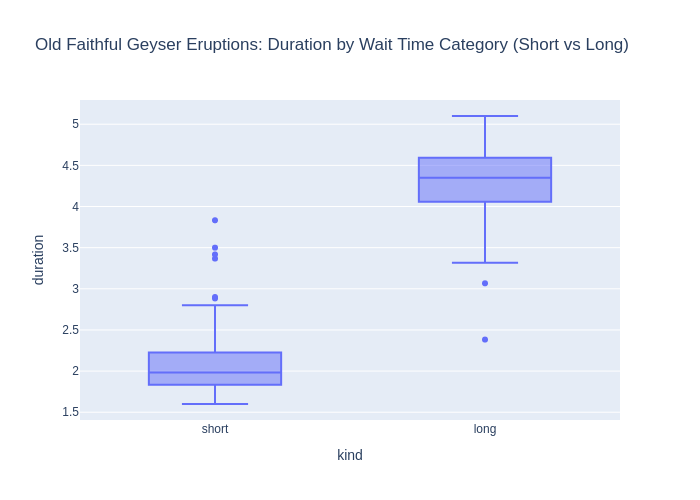

Observed difference in means: 2.2036002325581396
P-value from permutation test: 0.0


In [16]:
#Permutation test by shuffling the labels

import numpy as np
import pandas as pd

# Assuming old_faithful is your dataset with 'duration' as the response and 'kind' as the group indicator ('short' or 'long')
import statsmodels.formula.api as smf
import plotly.express as px
from IPython.display import display
import pandas as pd

# Ensure your dataset includes a 'kind' column based on wait times
# Assuming 'old_faithful' is your dataframe
old_faithful['kind'] = ['short' if wait < 68 else 'long' for wait in old_faithful['waiting']]

# Fit the model with the indicator variable 'kind'
model_with_kind = smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit()
display(model_with_kind.summary().tables[1])

# Create a box plot to visually compare durations between "short" and "long" wait categories
fig = px.box(old_faithful, x='kind', y='duration', 
             title='Old Faithful Geyser Eruptions: Duration by Wait Time Category (Short vs Long)',
             category_orders={'kind': ['short', 'long']})
fig.show(renderer="png")

# Calculate the observed difference in means between "long" and "short" groups
def calculate_observed_difference(data, group_col, value_col, group1, group2):
    group1_mean = data[data[group_col] == group1][value_col].mean()
    group2_mean = data[data[group_col] == group2][value_col].mean()
    return group2_mean - group1_mean

# Permutation test function
def permutation_test(data, group_col, value_col, group1, group2, n_permutations=10000):
    observed_diff = calculate_observed_difference(data, group_col, value_col, group1, group2)
    perm_diffs = []
    
    for _ in range(n_permutations):
        shuffled_labels = np.random.permutation(data[group_col])
        data[group_col] = shuffled_labels  # Temporarily reassign to shuffled labels
        perm_diff = calculate_observed_difference(data, group_col, value_col, group1, group2)
        perm_diffs.append(perm_diff)
    
    # Calculate p-value
    perm_diffs = np.array(perm_diffs)
    p_value = np.mean(np.abs(perm_diffs) >= np.abs(observed_diff))
    
    return observed_diff, perm_diffs, p_value


# Display the results

# Run the permutation test and assign results to variables
observed_diff, perm_diffs, p_value = permutation_test(old_faithful, 'kind', 'duration', 'short', 'long')

# Display the results
print(f"Observed difference in means: {observed_diff}")
print(f"P-value from permutation test: {p_value}")


In [17]:
# 95% bootstrap confidence interval 

import numpy as np
import pandas as pd

# Bootstrap function for calculating the 95% confidence interval for the difference in means
def bootstrap_confidence_interval(data, group_col, value_col, group1, group2, n_bootstrap=10000):
    bootstrapped_mean_differences = []
    
    for _ in range(n_bootstrap):
        # Resample with replacement within each group
        group1_sample = data[data[group_col] == group1][value_col].sample(frac=1, replace=True).mean()
        group2_sample = data[data[group_col] == group2][value_col].sample(frac=1, replace=True).mean()
        
        # Calculate the difference in means and store it
        mean_difference = group2_sample - group1_sample
        bootstrapped_mean_differences.append(mean_difference)
    
    # Calculate the 95% confidence interval
    confidence_interval = np.quantile(bootstrapped_mean_differences, [0.025, 0.975])
    
    return confidence_interval

# Assuming old_faithful is your dataset with 'duration' as the response and 'kind' as the group indicator ('short' or 'long')
# Example call for the function
confidence_interval = bootstrap_confidence_interval(old_faithful, 'kind', 'duration', 'short', 'long')

# Print the 95% confidence interval
print(f"95% Bootstrap Confidence Interval for the Difference in Means: {confidence_interval}")


95% Bootstrap Confidence Interval for the Difference in Means: [-0.39093916  0.17104323]


Explanation how the sampling approaches work for the two simulations.

1. Permutation Test(shuffling labels): the goal is to determine if the observed difference in means between the waiting groups could have arisen by chance if ther was actually no difference between groups. 
- Relies on the assumption of no difference between groups to calculate p-value, yields a p-value for statistical significance, and focuses on testing a hypothesis about the diffrence between groups. 
2. Bootstrap CI: it aims to estimate the range in which the true difference in means falls by repeatedly resampling within each group. 
- Does not assume any initial hypothesis, but rather estimates the likely range for the true difference, provides a confidnece range to show the interval within the difference is likely to lie, and provides a decritpitve measure of the variability and confidnece in the observed difference. 

*Chatbot summary:* https://chatgpt.com/share/672d63e0-2160-8002-acf3-9b44b7b4b6c3